Training very first PyTorch Cell

In [297]:
import torch

In [298]:
torch.cuda.is_available()

True

# Training Very first Pytorch Model:


# Importing the required libraries

In this notebook we will create an image classifier to detect playing cards.
We will tackle this problem in three steps:
1. Pytorch Dataset
2. Pytorch Model
3. Pytorch Training Loop


In [299]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [300]:
import sys
print('System Version: ',sys.version)
print('PyTorch Version: ',torch.__version__)
print('Torchvision version: ',torchvision.__version__)
print('Numpy version: ', np.__version__)
print('Pandas version: ',pd.__version__)

System Version:  3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
PyTorch Version:  2.0.0
Torchvision version:  0.15.1
Numpy version:  1.24.3
Pandas version:  2.1.4


Step 1. Setting up the Pytorch datset (and the Dataloader)


In [301]:
class PlayingCardDataset(Dataset):
    
    def __init__(self,data_dir,transform=None):
        self.data = ImageFolder(data_dir,transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [302]:
dataset = PlayingCardDataset(
    data_dir='/kaggle/input/cards-image-datasetclassification/train'
)

In [303]:
len(dataset)

7624

In [304]:
dataset[500]

(<PIL.Image.Image image mode=RGB size=224x224>, 3)

In [305]:
image, label = dataset[1000]

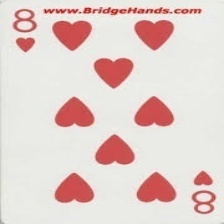

In [306]:
image

In [307]:
print(label)

6


In [308]:
#creating a dictionary to map target values with the folder name
data_dir = '/kaggle/input/cards-image-datasetclassification/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [309]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


In [310]:
data_dir = '/kaggle/input/cards-image-datasetclassification/train'
dataset = PlayingCardDataset(data_dir, transform)

In [311]:

dataset[1000]

(tensor([[[0.8314, 0.8549, 0.8627,  ..., 0.9137, 0.9176, 0.9216],
          [0.8157, 0.8588, 0.8863,  ..., 0.9059, 0.9020, 0.8980],
          [0.8706, 0.8941, 0.8863,  ..., 0.9216, 0.9216, 0.9176],
          ...,
          [0.7412, 0.8627, 0.8980,  ..., 0.8941, 0.9059, 0.9255],
          [0.6824, 0.8078, 0.8902,  ..., 0.8863, 0.8941, 0.9059],
          [0.6667, 0.7098, 0.8157,  ..., 0.8706, 0.8275, 0.8078]],
 
         [[0.8392, 0.8784, 0.8706,  ..., 0.9176, 0.9216, 0.9255],
          [0.8157, 0.8824, 0.8980,  ..., 0.9098, 0.9059, 0.9020],
          [0.8627, 0.9176, 0.9137,  ..., 0.9255, 0.9255, 0.9216],
          ...,
          [0.7451, 0.8667, 0.9020,  ..., 0.9176, 0.9216, 0.9176],
          [0.6863, 0.8118, 0.8941,  ..., 0.9098, 0.9020, 0.8980],
          [0.6706, 0.7137, 0.8196,  ..., 0.8902, 0.8275, 0.7804]],
 
         [[0.8118, 0.8471, 0.8471,  ..., 0.8980, 0.9020, 0.9059],
          [0.7961, 0.8549, 0.8784,  ..., 0.8902, 0.8863, 0.8824],
          [0.8549, 0.8980, 0.8941,  ...,

In [312]:
image, label = dataset[1000]
image.shape

torch.Size([3, 128, 128])

In [313]:
label


6

# Dataloaders

Batching the datasets

In [314]:
dataloader = DataLoader(dataset,batch_size=32, shuffle=True)

In [315]:
for images, labels in dataloader:
    break

In [316]:
images.shape, labels.shape 

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [317]:
labels
#Note the labels are random now

tensor([48, 11,  8, 43, 30, 25, 40, 33, 14, 27, 50, 36, 24, 38, 13, 35, 43, 45,
        52, 33, 49, 48, 37, 28,  4, 37,  6,  5, 26, 51, 32, 17])

# Step 2: PyTorch Model

In [318]:
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [319]:
model = SimpleCardClassifer(num_classes=53)
print(str(model)[:500])

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


In [320]:
print(model)

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, ker

In [321]:
example_out = model(images)
example_out.shape
# [batch_size, num_classes]

torch.Size([32, 53])

# Step 3: Training

In [322]:
# Loss Function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)


In [323]:
criterion(example_out,labels)

tensor(3.9839, grad_fn=<NllLossBackward0>)

In [324]:
transform = transforms.Compose([transforms.Resize((128,128)),
                              transforms.ToTensor(),
                               ])

train_folder = '../input/cards-image-datasetclassification/train/'
valid_folder = '../input/cards-image-datasetclassification/valid/'
test_folder = '../input/cards-image-datasetclassification/test/'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset= PlayingCardDataset(valid_folder, transform=transform)
test_dataset= PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size =32, shuffle=True)
val_loader= DataLoader(val_dataset, batch_size =32, shuffle=False)
test_loader= DataLoader(test_dataset, batch_size =32, shuffle=False)

Training very first PyTorch Cell

In [325]:
torch.cuda.is_available()

True

# Training Very first Pytorch Model:


# Importing the required libraries

In this notebook we will create an image classifier to detect playing cards.
We will tackle this problem in three steps:
1. Pytorch Dataset
2. Pytorch Model
3. Pytorch Training Loop


In [326]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [327]:
import sys
print('System Version: ',sys.version)
print('PyTorch Version: ',torch.__version__)
print('Torchvision version: ',torchvision.__version__)
print('Numpy version: ', np.__version__)
print('Pandas version: ',pd.__version__)

System Version:  3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
PyTorch Version:  2.0.0
Torchvision version:  0.15.1
Numpy version:  1.24.3
Pandas version:  2.1.4


Step 1. Setting up the Pytorch datset (and the Dataloader)


In [328]:
class PlayingCardDataset(Dataset):
    
    def __init__(self,data_dir,transform=None):
        self.data = ImageFolder(data_dir,transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [329]:
dataset = PlayingCardDataset(
    data_dir='/kaggle/input/cards-image-datasetclassification/train'
)

In [330]:
len(dataset)

7624

In [331]:
dataset[500]

(<PIL.Image.Image image mode=RGB size=224x224>, 3)

In [332]:
image, label = dataset[1000]

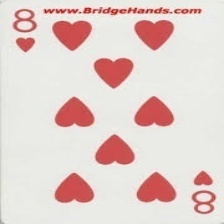

In [333]:
image

In [334]:
print(label)

6


In [335]:
#creating a dictionary to map target values with the folder name
data_dir = '/kaggle/input/cards-image-datasetclassification/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [336]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])


In [337]:
data_dir = '/kaggle/input/cards-image-datasetclassification/train'
dataset = PlayingCardDataset(data_dir, transform)

In [338]:

dataset[1000]

(tensor([[[0.8314, 0.8549, 0.8627,  ..., 0.9137, 0.9176, 0.9216],
          [0.8157, 0.8588, 0.8863,  ..., 0.9059, 0.9020, 0.8980],
          [0.8706, 0.8941, 0.8863,  ..., 0.9216, 0.9216, 0.9176],
          ...,
          [0.7412, 0.8627, 0.8980,  ..., 0.8941, 0.9059, 0.9255],
          [0.6824, 0.8078, 0.8902,  ..., 0.8863, 0.8941, 0.9059],
          [0.6667, 0.7098, 0.8157,  ..., 0.8706, 0.8275, 0.8078]],
 
         [[0.8392, 0.8784, 0.8706,  ..., 0.9176, 0.9216, 0.9255],
          [0.8157, 0.8824, 0.8980,  ..., 0.9098, 0.9059, 0.9020],
          [0.8627, 0.9176, 0.9137,  ..., 0.9255, 0.9255, 0.9216],
          ...,
          [0.7451, 0.8667, 0.9020,  ..., 0.9176, 0.9216, 0.9176],
          [0.6863, 0.8118, 0.8941,  ..., 0.9098, 0.9020, 0.8980],
          [0.6706, 0.7137, 0.8196,  ..., 0.8902, 0.8275, 0.7804]],
 
         [[0.8118, 0.8471, 0.8471,  ..., 0.8980, 0.9020, 0.9059],
          [0.7961, 0.8549, 0.8784,  ..., 0.8902, 0.8863, 0.8824],
          [0.8549, 0.8980, 0.8941,  ...,

In [339]:
image, label = dataset[1000]
image.shape

torch.Size([3, 128, 128])

In [340]:
label


6

# Dataloaders

Batching the datasets

In [341]:
dataloader = DataLoader(dataset,batch_size=32, shuffle=True)

In [342]:
for images, labels in dataloader:
    break

In [343]:
images.shape, labels.shape 

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [344]:
labels
#Note the labels are random now

tensor([49, 22,  0, 17, 34, 26, 32, 14, 11,  4, 12, 14, 33, 48, 23, 27,  4, 50,
        24, 14, 37, 43, 34, 38, 38, 21, 41, 39, 15, 42, 18, 17])

# Step 2: PyTorch Model

In [345]:
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [346]:
model = SimpleCardClassifer(num_classes=53)
print(str(model)[:500])

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


In [347]:
example_out = model(images)
example_out.shape # [batch_size, num_classes]

torch.Size([32, 53])

## Step 3: Training Loop

In [348]:
# Loss function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [349]:
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 53]) torch.Size([32])


In [350]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = '../input/cards-image-datasetclassification/train/'
valid_folder = '../input/cards-image-datasetclassification/valid/'
test_folder = '../input/cards-image-datasetclassification/test/'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [351]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [352]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 1.5166957041274087, Validation loss: 0.4491474131368241


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.5534367531788187, Validation loss: 0.18945107088898713


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.31689205429548983, Validation loss: 0.15296779218709694


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.2384329629047595, Validation loss: 0.24056507551445153


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.2016857926033101, Validation loss: 0.14965694704145754


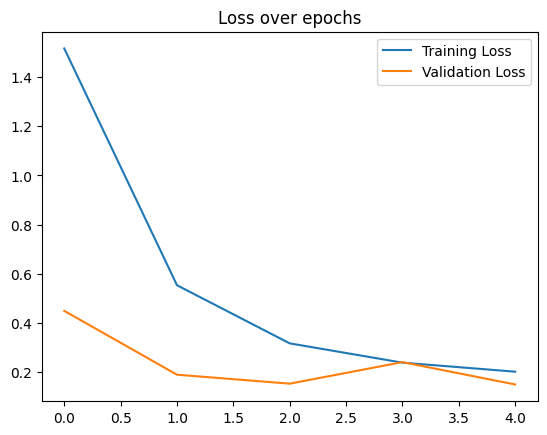

In [353]:
#visiualize
plt.plot(train_losses, label = 'Training Loss')
plt.plot(val_losses, label = 'Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()


## Evaluating the results

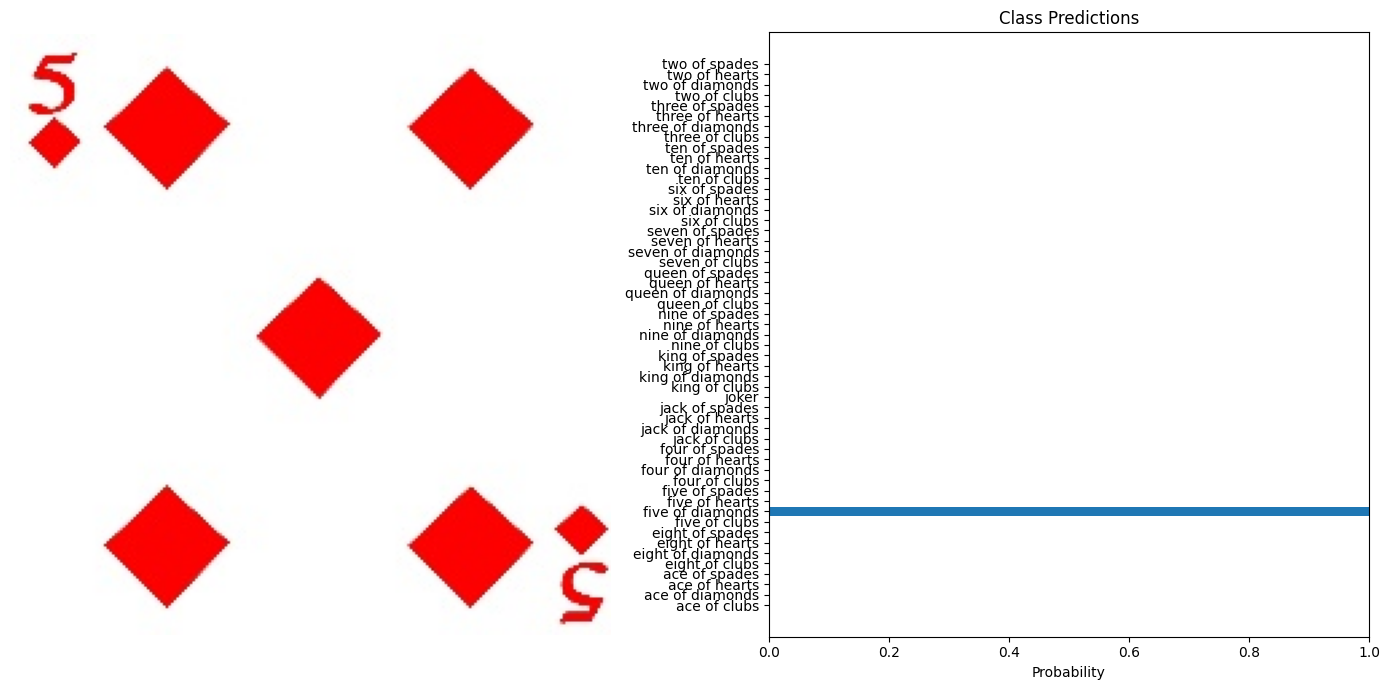

In [354]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example usage
test_image = "/kaggle/input/cards-image-datasetclassification/test/five of diamonds/2.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes 
visualize_predictions(original_image, probabilities, class_names)

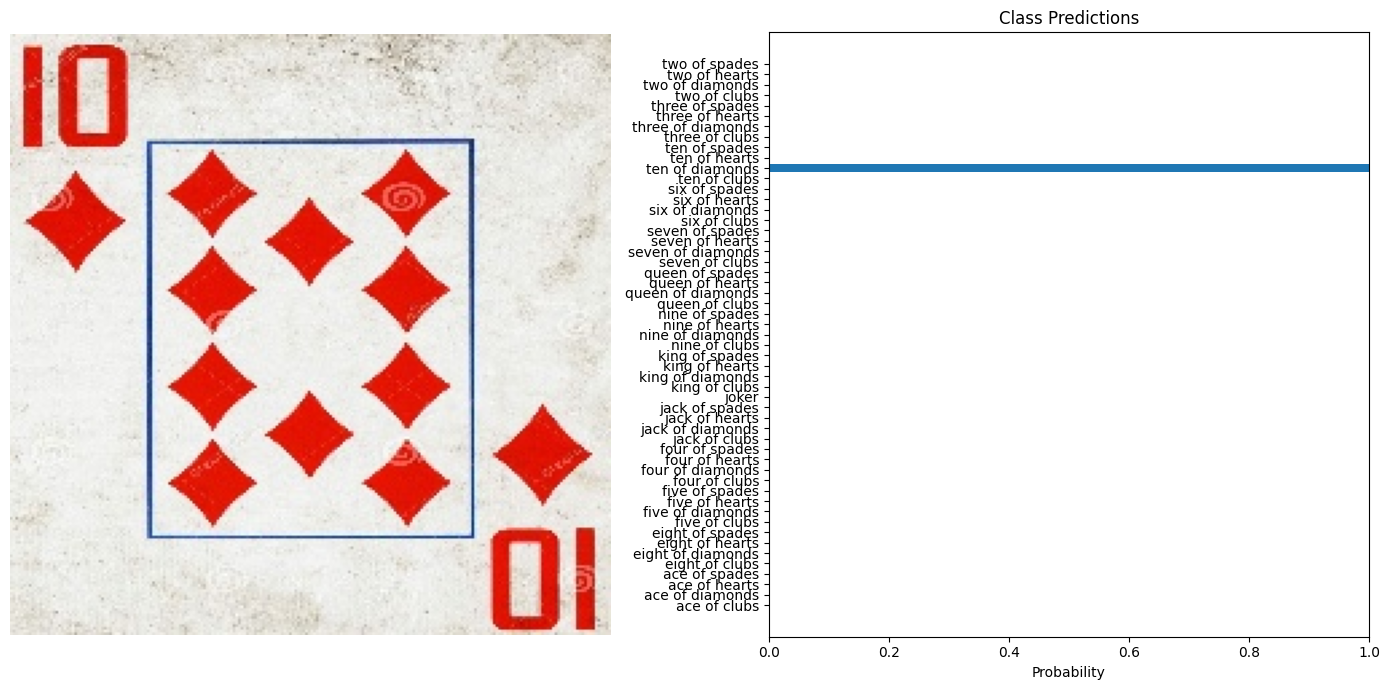

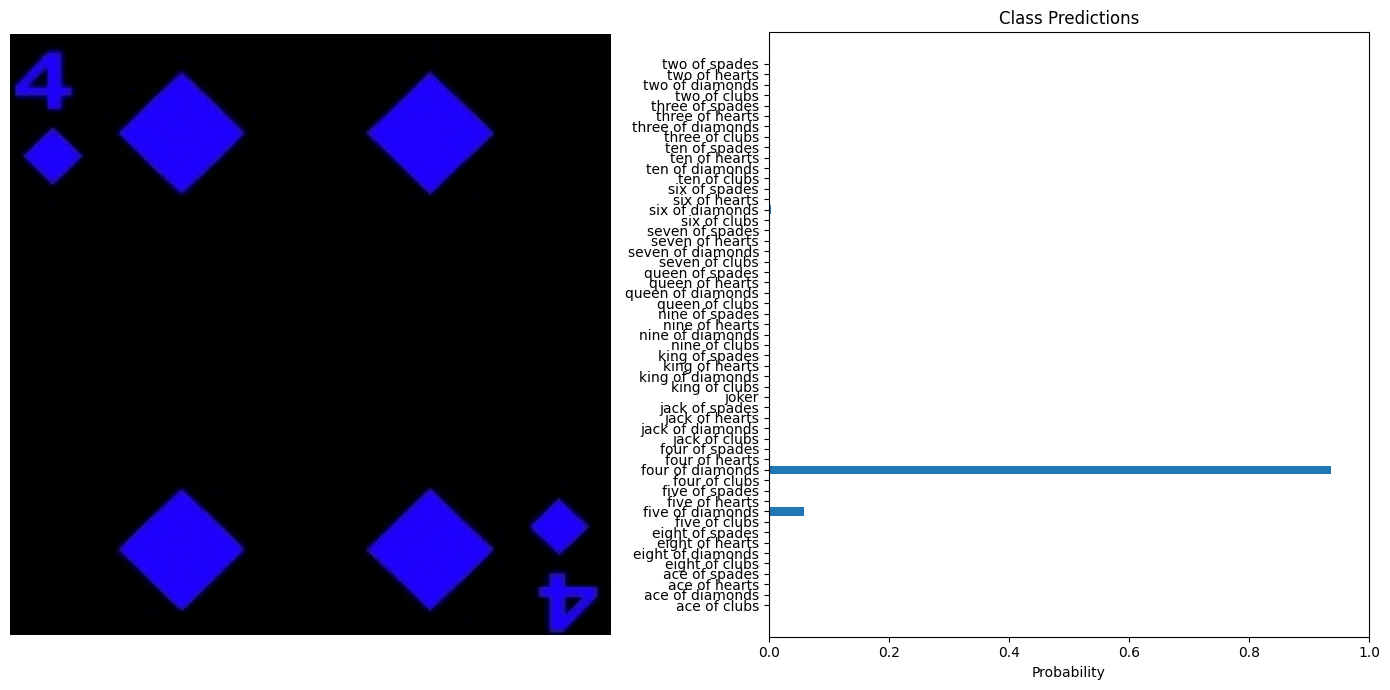

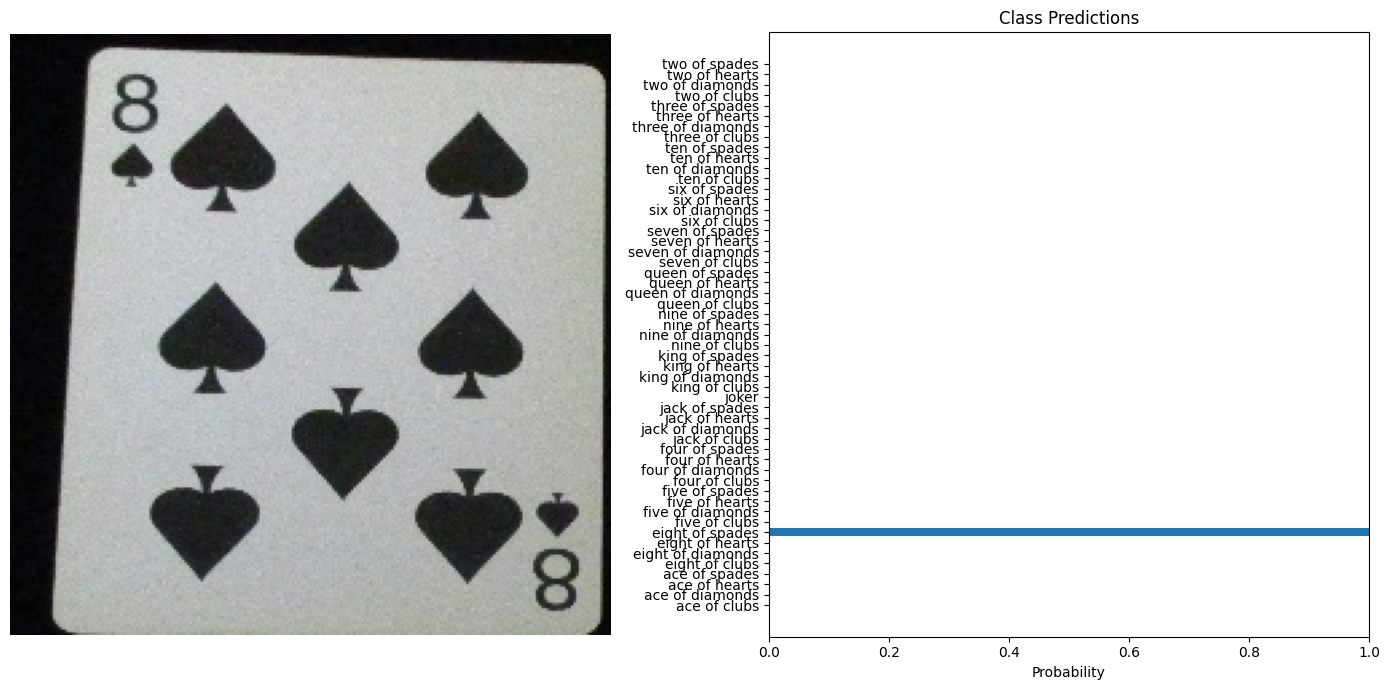

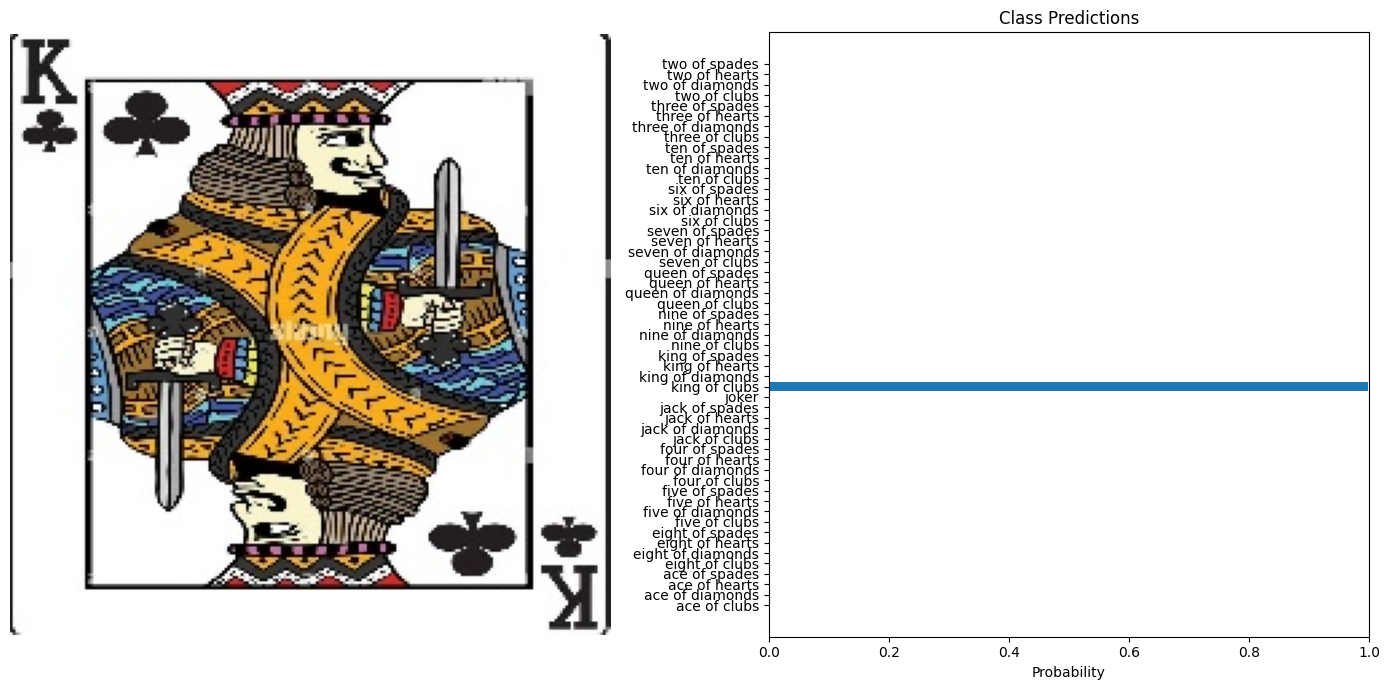

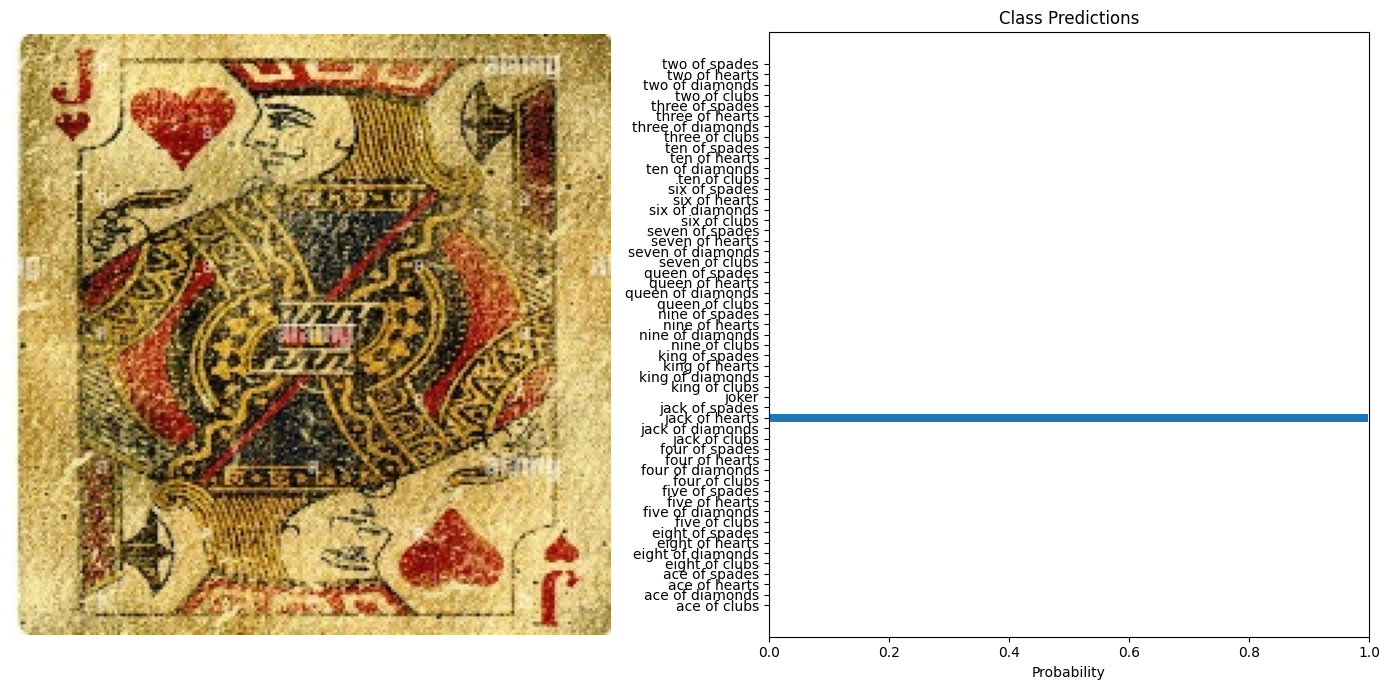

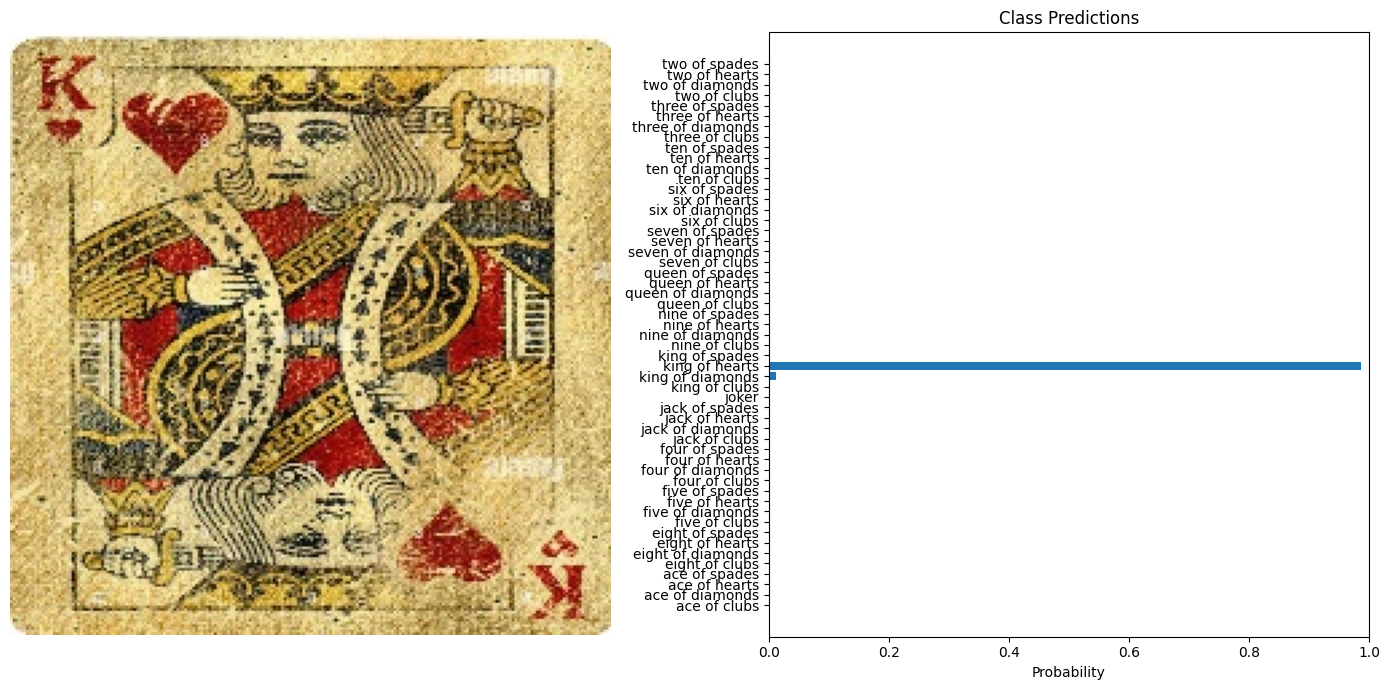

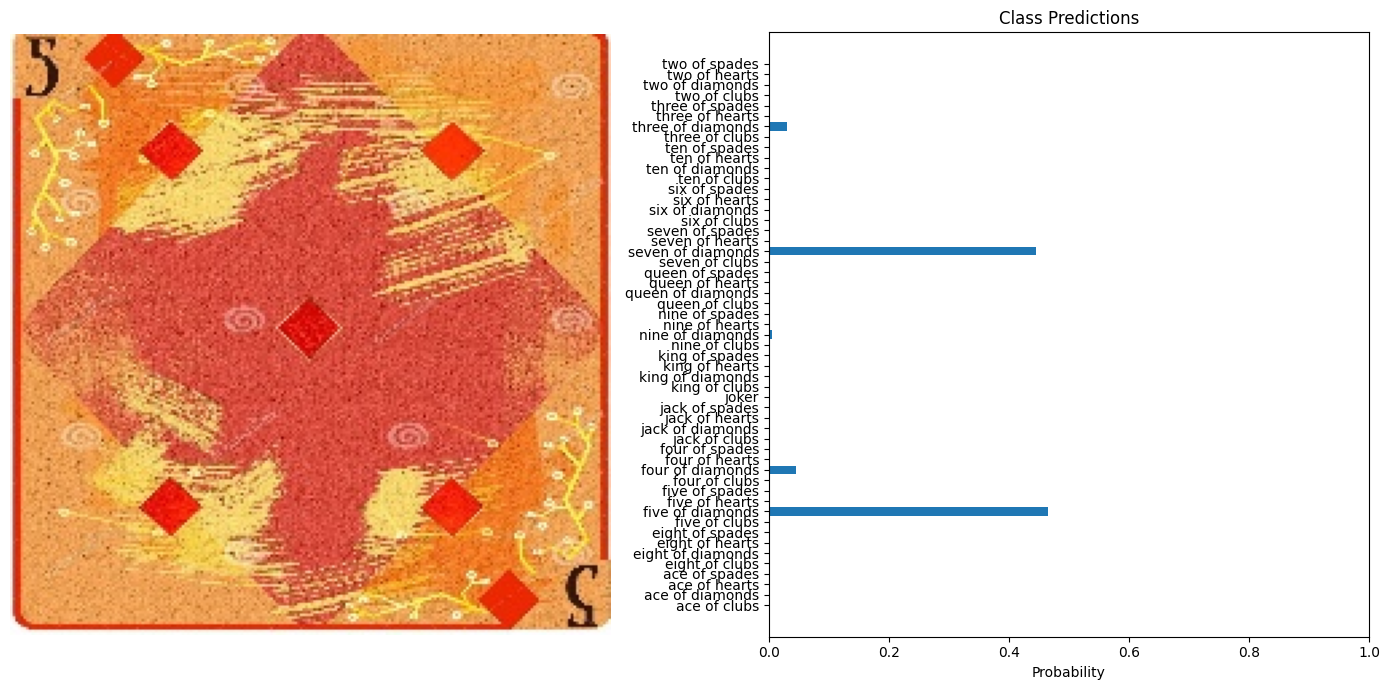

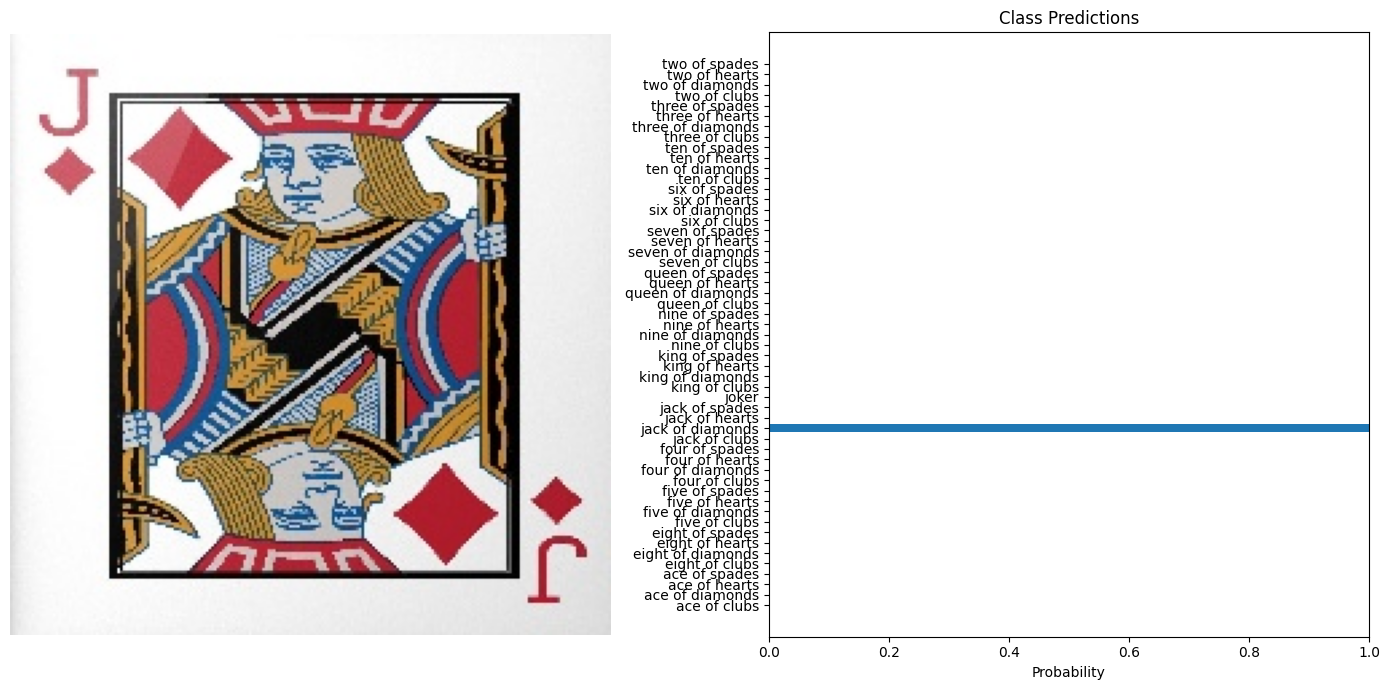

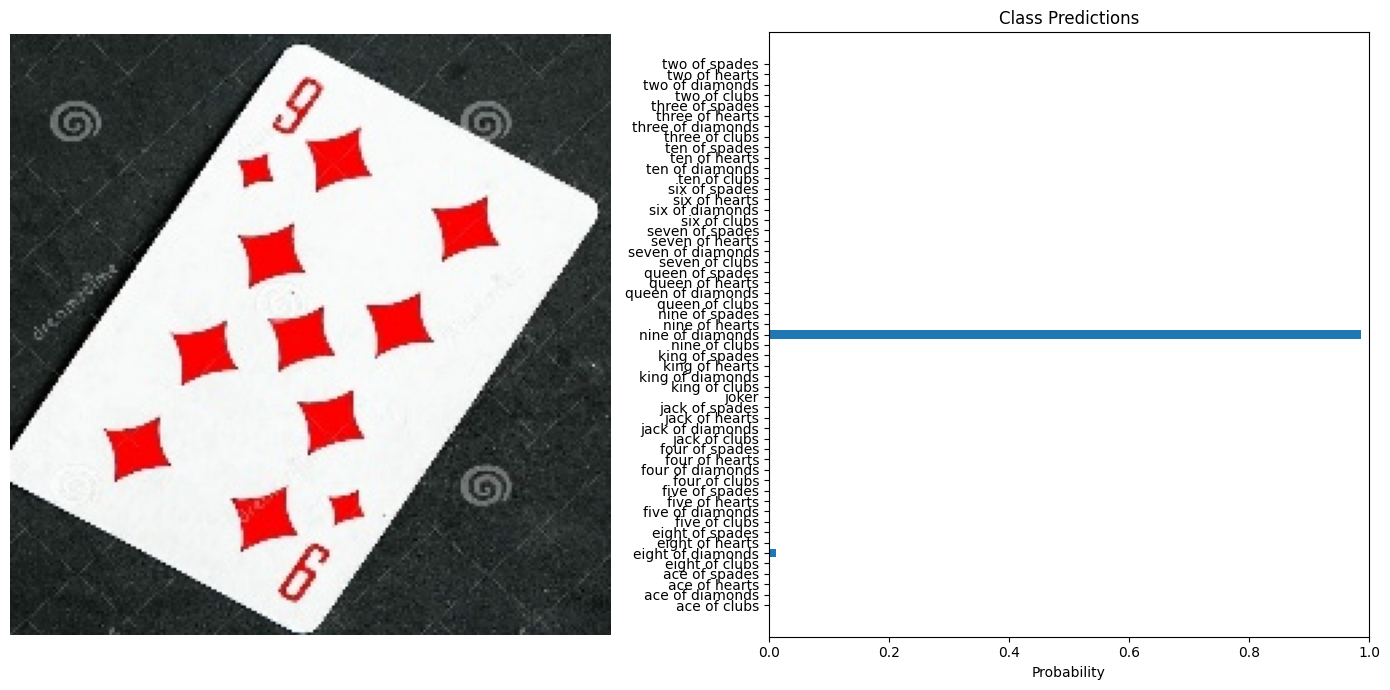

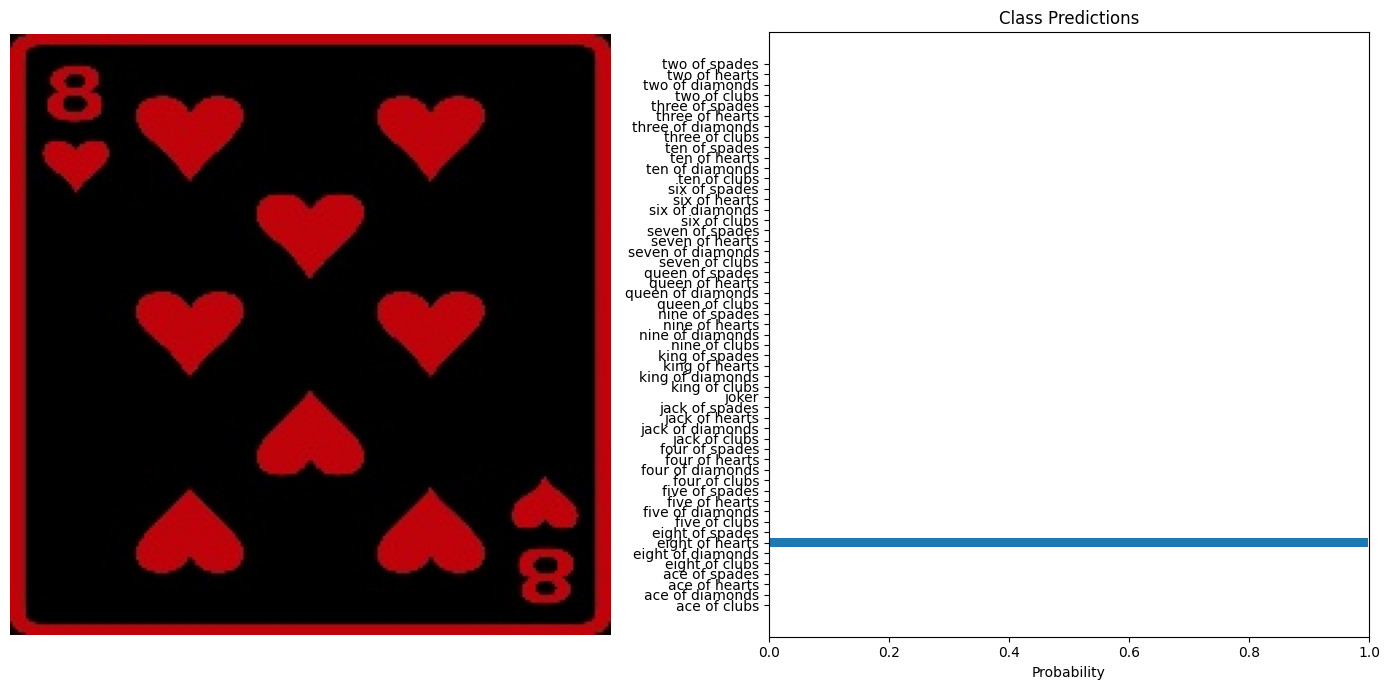

In [355]:
from glob import glob
test_images = glob('../input/cards-image-datasetclassification/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes 
    visualize_predictions(original_image, probabilities, class_names)